In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Verify if the file exists
file_path = '/content/drive/My Drive/archive (9).zip'
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found. Check the path.")


File found!


In [ ]:
import zipfile

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/archive (9).zip'

# Path to extract the contents
extract_dir = '/content/drive/My Drive/extracted_data/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete!")


Extraction complete!


In [ ]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [ ]:
# List the contents of the extracted directory
print("Contents of the extracted directory:")
print(os.listdir(extract_dir))

# Verify if the 'animals' folder exists
animals_dir = os.path.join(extract_dir, 'animals')
if os.path.exists(animals_dir):
    print(f"'animals' folder found at: {animals_dir}")
else:
    print("'animals' folder not found. Please check the extraction process.")


Contents of the extracted directory:
['Animals', 'README.md']
'animals' folder not found. Please check the extraction process.


In [ ]:
import zipfile

# Open the zip file and list its contents
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    print("Contents of the zip file:")
    zip_ref.printdir()


Contents of the zip file:
File Name                                             Modified             Size
Animals/cats/0_0001.jpg                        2024-07-08 07:58:54        15252
Animals/cats/0_0002.jpg                        2024-07-08 07:58:54         7877
Animals/cats/0_0003.jpg                        2024-07-08 07:58:54        13096
Animals/cats/0_0004.jpg                        2024-07-08 07:58:54         8783
Animals/cats/0_0005.jpg                        2024-07-08 07:58:54        15027
Animals/cats/0_0006.jpg                        2024-07-08 07:58:54         8881
Animals/cats/0_0007.jpg                        2024-07-08 07:58:54         8416
Animals/cats/0_0008.jpg                        2024-07-08 07:58:54         8491
Animals/cats/0_0009.jpg                        2024-07-08 07:58:54        11652
Animals/cats/0_0010.jpg                        2024-07-08 07:58:54        14192
Animals/cats/0_0011.jpg                        2024-07-08 07:58:54        10456
Animals/cats/0

In [ ]:
import os
import zipfile

# Define the extraction directory
extract_dir = '/content/drive/My Drive/extracted_data/'

# Extract the zip file again
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete!")

# List the contents of the extracted directory
print("Contents of the extracted directory:")
print(os.listdir(extract_dir))


Extraction complete!
Contents of the extracted directory:
['Animals', 'README.md']


In [ ]:
# Correct the path to point to the 'Animals' folder
animals_dir = os.path.join(extract_dir, 'Animals')

# Verify if the 'Animals' folder exists
if os.path.exists(animals_dir):
    print(f"'Animals' folder found at: {animals_dir}")
else:
    print("'Animals' folder not found. Please check the extraction process.")


'Animals' folder found at: /content/drive/My Drive/extracted_data/Animals


In [ ]:
from torchvision import datasets, transforms

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load the dataset from the 'Animals' folder
dataset = datasets.ImageFolder(animals_dir, transform=transform)

# Verify that the dataset is loaded correctly
print(f"Classes: {dataset.classes}")


Classes: ['cats', 'dogs', 'snakes']


In [ ]:
data_dir=os.path.join(extract_dir,"Animals")

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_dataset=datasets.ImageFolder(data_dir,transform=transform)

In [ ]:
train_size=int(0.8*len(train_dataset))
test_size=len(train_dataset)-train_size
train_dataset,test_dataset=torch.utils.data.random_split(train_dataset,[train_size,test_size])

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

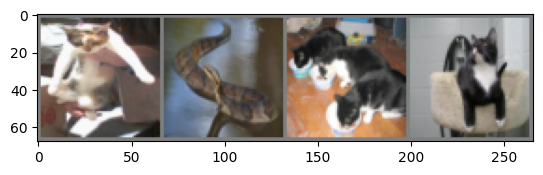

Labels: tensor([0, 2, 0, 0])


In [ ]:
# prompt: i want to see some photos from the dataset
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the train_loader
images, labels = next(iter(train_loader))

# Function to unnormalize and display an image
def imshow(img):
  img = img / 2 + 0.5  # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# Display some images
imshow(torchvision.utils.make_grid(images[:4]))

# Print the corresponding labels
print(f"Labels: {labels[:4]}")

# You can also iterate through the dataset and display individual images:
# for image, label in train_dataset:
#   imshow(image)
#   print(f"Label: {label}")
#   break  # Display only one image for example


In [ ]:
# Create an instance of the model
model = CustomCNN()

# Move the model to the desired device
model.to(device)

CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
def train_model(model,train_loader,criterion,optimizer,num_epochs=10):
  model.train()
  for epoch in range(num_epochs):
    running_loss=0.0
    for inputs,labels in train_loader:
      inputs,labels=inputs.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=model(inputs)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
      print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")



train_model(model,train_loader,criterion,optimizer,num_epochs=10)

Epoch 1/10, Loss: 0.03040940284729004
Training Complete!
Epoch 1/10, Loss: 0.05561017990112305
Training Complete!
Epoch 1/10, Loss: 0.07639779249827067
Training Complete!
Epoch 1/10, Loss: 0.09551785469055175
Training Complete!
Epoch 1/10, Loss: 0.11141571203867594
Training Complete!
Epoch 1/10, Loss: 0.12473353465398153
Training Complete!
Epoch 1/10, Loss: 0.142257928053538
Training Complete!
Epoch 1/10, Loss: 0.15997409741083782
Training Complete!
Epoch 1/10, Loss: 0.17709389448165894
Training Complete!
Epoch 1/10, Loss: 0.19373627106348673
Training Complete!
Epoch 1/10, Loss: 0.20769456624984742
Training Complete!
Epoch 1/10, Loss: 0.22160513321558634
Training Complete!
Epoch 1/10, Loss: 0.23834622303644817
Training Complete!
Epoch 1/10, Loss: 0.25707712570826213
Training Complete!
Epoch 1/10, Loss: 0.2735579498608907
Training Complete!
Epoch 1/10, Loss: 0.2884934115409851
Training Complete!
Epoch 1/10, Loss: 0.304462886651357
Training Complete!
Epoch 1/10, Loss: 0.319720512231191
T

In [ ]:

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')


evaluate_model(model, test_loader)


Accuracy of the model on the test images: 68.83%
